### Import Libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Define functions

In [122]:
def split_categories(df, category_col):
    for row in range(df.shape[0]):
        for cat in {cat.strip() for cat in df.loc[row, category_col].split(",")}:
            df.loc[row, category_col + "_" + cat] = 1
            
def split_vol_chpt(x, index, else_value):
    if type(x) == str and x.split(" / ")[index].isnumeric():
        return x.split(" / ")[index]     
    else:
        return else_value

### Cleaning Manga Titles

In [163]:
# Load data set
manga_titles = pd.read_csv("../data/manga_titles.csv")
manga_titles

,Unnamed: 0,manga_title,manga_link
0,0,Berserk,https://myanimelist.net/manga/2/Berserk
1,1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,https://myanimelist.net/manga/1706/JoJo_no_Kim...
2,2,One Piece,https://myanimelist.net/manga/13/One_Piece
3,3,Vagabond,https://myanimelist.net/manga/656/Vagabond
4,4,Monster,https://myanimelist.net/manga/1/Monster
...,...,...,...
12495,12495,Shiniden,https://myanimelist.net/manga/2544/Shiniden
12496,12496,Tenshi ni Naru mon!,https://myanimelist.net/manga/2569/Tenshi_ni_N...
12497,12497,Zenmaijikake no Tina,https://myanimelist.net/manga/2582/Zenmaijikak...
12498,12498,Niji no Densetsu,https://myanimelist.net/manga/2586/Niji_no_Den...


In [164]:
# Drop Unnamed: 0
manga_titles.drop(columns='Unnamed: 0', inplace=True)
manga_titles

,manga_title,manga_link
0,Berserk,https://myanimelist.net/manga/2/Berserk
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,https://myanimelist.net/manga/1706/JoJo_no_Kim...
2,One Piece,https://myanimelist.net/manga/13/One_Piece
3,Vagabond,https://myanimelist.net/manga/656/Vagabond
4,Monster,https://myanimelist.net/manga/1/Monster
...,...,...
12495,Shiniden,https://myanimelist.net/manga/2544/Shiniden
12496,Tenshi ni Naru mon!,https://myanimelist.net/manga/2569/Tenshi_ni_N...
12497,Zenmaijikake no Tina,https://myanimelist.net/manga/2582/Zenmaijikak...
12498,Niji no Densetsu,https://myanimelist.net/manga/2586/Niji_no_Den...


In [165]:
# Check shape of data set
manga_titles.shape

(12500, 2)

In [168]:
# There seems to be 121 duplicates. Maybe the website ranking changed when the scrapping the website for titles
manga_titles.shape[0] - manga_titles.drop_duplicates().shape[0]

121

In [169]:
# Drop duplicate rows
manga_titles.drop_duplicates(inplace=True)

In [179]:
# Reset index so that index is created in the column to be used for merging with other data sets
manga_titles.reset_index(inplace=True)

In [180]:
# Check if there are mangas with same title
temp = manga_titles['manga_title'].value_counts()
temp

Clover                                                                                  4
Blue                                                                                    4
Switch                                                                                  3
Ningen Shikkaku                                                                         3
Kanon                                                                                   3
                                                                                       ..
Pink                                                                                    1
Satou-kun wa Miteiru.: Kamisama Appli de Onnanoko no Kokoro wo Nozoitara Do xx Datta    1
Carbonard Crown                                                                         1
White Album                                                                             1
30-sai, Shojo OL                                                                        1
Name: mang

In [181]:
# There are 85 entries which have same title to 1 or more mangas, so we cannot use titles to merge different tables together
len(temp[temp > 1])

85

In [183]:
# Write clean data set to file
manga_titles.to_csv("../data_cleaned/manga_titles_cleaned.csv", index=False)

### Clean Manga Details

In [641]:
# Load manga details data set
manga_details = pd.read_csv("../data/manga_details_compiled.csv")
manga_details

,Unnamed: 0,index,title,volumes,chapters,status,published,genres,themes,demographic,serialization,authors,file_index
0,0,0,Berserk,41,380,On Hiatus,"Aug 25, 1989 to Sep 10, 2021","Action, Adventure, Award Winning, Drama, Fanta...","Gore, Military, Mythology, Psychological",Seinen,Young Animal,"Miura, Kentarou (Story & Art)",0
1,1,1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","Action, Adventure, Horror, Mystery, Supernatural",Historical,"Seinen, Shounen",Ultra Jump,"Araki, Hirohiko (Story & Art)",0
2,2,2,One Piece,Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","Action, Adventure, Fantasy",NaN,Shounen,Shounen Jump (Weekly),"Oda, Eiichiro (Story & Art)",0
3,3,3,Vagabond,37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","Action, Adventure, Award Winning, Drama","Historical, Samurai",Seinen,Morning,"Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...",0
4,4,4,Monster,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","Award Winning, Drama, Mystery","Adult Cast, Psychological",Seinen,Big Comic Original,"Urasawa, Naoki (Story & Art)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,95,9995,Devil-chi,Unknown,Unknown,Publishing,"Jan 3, 2016 to ?","Comedy, Romance, Supernatural, Ecchi",School,NaN,Ganma!,Musuaki (Story & Art),99
12496,96,9996,Toji no Miko,3,16,Finished,"Oct 26, 2017 to Mar 26, 2019","Action, Fantasy, Supernatural",NaN,Shounen,Shounen Ace,"Saitou, Sakae (Art)",99
12497,97,9997,Gokujou Bitter Shounen,1,4,Finished,2006,Romance,NaN,Shoujo,Dessert,"Watabe, Mihou (Story & Art)",99
12498,98,9998,Celestial Clothes,11,65,Finished,"Jun 26, 2010 to Feb 26, 2016","Action, Comedy, Drama, Fantasy, Supernatural",NaN,Shounen,Shounen Sirius,"Shiono, Etorouji (Story & Art)",99


In [642]:
# Check the shape of the manga details dataframe
manga_details.shape

(12500, 13)

In [643]:
# Drop Unnamed: 0 and file_index
manga_details.drop(columns=['Unnamed: 0', 'file_index'], inplace=True)
manga_details

,index,title,volumes,chapters,status,published,genres,themes,demographic,serialization,authors
0,0,Berserk,41,380,On Hiatus,"Aug 25, 1989 to Sep 10, 2021","Action, Adventure, Award Winning, Drama, Fanta...","Gore, Military, Mythology, Psychological",Seinen,Young Animal,"Miura, Kentarou (Story & Art)"
1,1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","Action, Adventure, Horror, Mystery, Supernatural",Historical,"Seinen, Shounen",Ultra Jump,"Araki, Hirohiko (Story & Art)"
2,2,One Piece,Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","Action, Adventure, Fantasy",NaN,Shounen,Shounen Jump (Weekly),"Oda, Eiichiro (Story & Art)"
3,3,Vagabond,37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","Action, Adventure, Award Winning, Drama","Historical, Samurai",Seinen,Morning,"Inoue, Takehiko (Story & Art), Yoshikawa, Eiji..."
4,4,Monster,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","Award Winning, Drama, Mystery","Adult Cast, Psychological",Seinen,Big Comic Original,"Urasawa, Naoki (Story & Art)"
...,...,...,...,...,...,...,...,...,...,...,...
12495,9995,Devil-chi,Unknown,Unknown,Publishing,"Jan 3, 2016 to ?","Comedy, Romance, Supernatural, Ecchi",School,NaN,Ganma!,Musuaki (Story & Art)
12496,9996,Toji no Miko,3,16,Finished,"Oct 26, 2017 to Mar 26, 2019","Action, Fantasy, Supernatural",NaN,Shounen,Shounen Ace,"Saitou, Sakae (Art)"
12497,9997,Gokujou Bitter Shounen,1,4,Finished,2006,Romance,NaN,Shoujo,Dessert,"Watabe, Mihou (Story & Art)"
12498,9998,Celestial Clothes,11,65,Finished,"Jun 26, 2010 to Feb 26, 2016","Action, Comedy, Drama, Fantasy, Supernatural",NaN,Shounen,Shounen Sirius,"Shiono, Etorouji (Story & Art)"


In [644]:
# Drop duplicates rows
manga_details.drop_duplicates()

,index,title,volumes,chapters,status,published,genres,themes,demographic,serialization,authors
0,0,Berserk,41,380,On Hiatus,"Aug 25, 1989 to Sep 10, 2021","Action, Adventure, Award Winning, Drama, Fanta...","Gore, Military, Mythology, Psychological",Seinen,Young Animal,"Miura, Kentarou (Story & Art)"
1,1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","Action, Adventure, Horror, Mystery, Supernatural",Historical,"Seinen, Shounen",Ultra Jump,"Araki, Hirohiko (Story & Art)"
2,2,One Piece,Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","Action, Adventure, Fantasy",NaN,Shounen,Shounen Jump (Weekly),"Oda, Eiichiro (Story & Art)"
3,3,Vagabond,37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","Action, Adventure, Award Winning, Drama","Historical, Samurai",Seinen,Morning,"Inoue, Takehiko (Story & Art), Yoshikawa, Eiji..."
4,4,Monster,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","Award Winning, Drama, Mystery","Adult Cast, Psychological",Seinen,Big Comic Original,"Urasawa, Naoki (Story & Art)"
...,...,...,...,...,...,...,...,...,...,...,...
12495,9995,Devil-chi,Unknown,Unknown,Publishing,"Jan 3, 2016 to ?","Comedy, Romance, Supernatural, Ecchi",School,NaN,Ganma!,Musuaki (Story & Art)
12496,9996,Toji no Miko,3,16,Finished,"Oct 26, 2017 to Mar 26, 2019","Action, Fantasy, Supernatural",NaN,Shounen,Shounen Ace,"Saitou, Sakae (Art)"
12497,9997,Gokujou Bitter Shounen,1,4,Finished,2006,Romance,NaN,Shoujo,Dessert,"Watabe, Mihou (Story & Art)"
12498,9998,Celestial Clothes,11,65,Finished,"Jun 26, 2010 to Feb 26, 2016","Action, Comedy, Drama, Fantasy, Supernatural",NaN,Shounen,Shounen Sirius,"Shiono, Etorouji (Story & Art)"


In [645]:
# Set 'index' as index
manga_details.set_index('index', inplace=True)

In [646]:
# Since 'published' column consists of start date of publication and end of publication,
# we will only look at the start of publication since when the manga started would greatly affect the content and art style
manga_details['published_year_start'] = manga_details['published'].apply(lambda x: x.split('to')[0][-5:].strip())

In [647]:
manga_details['published_year_start'].unique()

array(['1989', '2004', '1997', '1998', '1994', '2001', '1990', '2007',
       '2014', '2005', '2006', '1999', '1968', '2012', '2015', '1996',
       '2003', '2013', '2009', '1982', '2016', '2000', '2018', '2017',
       '1970', '2019', '1985', '2002', '2011', '1992', '2008', '2020',
       '1966', '2010', '1988', '1976', '1969', '1993', '1984', '1973',
       '1991', '1972', '1980', '1981', '1995', '2021', '1978', '1971',
       '2022', '1987', 'lable', '1974', '1986', '1979', '1965', '1949',
       '1947', '1951', '1953', '1962', '1960', '1983', '1957', '1967',
       '1975', '1977', '1946', '1948', '1959', '1964', '1961', '1950',
       '1956', '1958'], dtype=object)

In [648]:
manga_details.loc[manga_details[manga_details['published_year_start']=='lable'].index, 'published_year_start'] = 'Not available'

In [649]:
# Check for NA
manga_details.isnull().sum()

title                      0
volumes                    0
chapters                   0
status                     0
published                  0
genres                   388
themes                  6055
demographic             3639
serialization              0
authors                    0
published_year_start       0
dtype: int64

In [650]:
# As the themes are not specified for some of the titles, to impute those titles with "Not Specified"
manga_details['themes'].fillna("Not Specified", inplace=True)

In [651]:
# Check what are the rows where demographic is NA
manga_details[manga_details['demographic'].isnull()]

,title,volumes,chapters,status,published,genres,themes,demographic,serialization,authors,published_year_start
index,,,,,,,,,,,
18,Yotsuba to!,Unknown,Unknown,Publishing,"Mar 21, 2003 to ?","Award Winning, Comedy, Slice of Life","Childcare, Iyashikei",NaN,Dengeki Daioh,"Azuma, Kiyohiko (Story & Art)",2003
22,Kaze no Tani no Nausicaä,7,59,Finished,"Oct 9, 1982 to Feb 10, 1994","Action, Adventure, Award Winning, Fantasy, Sup...",Not Specified,NaN,Animage,"Miyazaki, Hayao (Story & Art)",1982
24,Made in Abyss,Unknown,Unknown,Publishing,"Oct 20, 2012 to ?","Adventure, Drama, Fantasy, Sci-Fi",Not Specified,NaN,Web Comic Gamma,"Tsukushi, Akihito (Story & Art)",2012
38,Shoujo Shuumatsu Ryokou,6,47,Finished,"Feb 21, 2014 to Jan 12, 2018","Adventure, Award Winning, Slice of Life",Iyashikei,NaN,Kurage Bunch,Tsukumizu (Story & Art),2014
39,Yagate Kimi ni Naru,8,50,Finished,"Apr 27, 2015 to Sep 27, 2019","Drama, Girls Love",School,NaN,Dengeki Daioh,"Nakatani, Nio (Story & Art)",2015
...,...,...,...,...,...,...,...,...,...,...,...
9968,Sweet vs Home,1,3,Finished,"Oct 20, 1994 to Jun 24, 1996",Boys Love,Not Specified,NaN,Racish,"Abe, Miyuki (Story & Art)",1994
9979,Love Café?,1,5,Finished,2002,Boys Love,Not Specified,NaN,Biblos,"Kamo, Nabako (Story & Art)",2002
9986,Otome no Iroha!,1,5,Finished,2008,"Comedy, Ecchi","Magical Sex Shift, School",NaN,Dragon Age Pure,Mikage (Story & Art),2008


In [652]:
# Check what are the unique values for demographic
manga_details['demographic'].unique()

array(['Seinen', 'Seinen, Shounen', 'Shounen', nan, 'Shoujo', 'Josei',
       'Kids, Shounen', 'Kids', 'Kids, Seinen', 'Josei, Seinen',
       'Kids, Shoujo', 'Seinen, Shoujo'], dtype=object)

Since the publisher usually targets certain groups, we can use the serialization column to infer what the demographic for these rows with missing values for demographic.

In [653]:
# Check if we can use serialization to determine the demographic
for i in manga_details['serialization'].unique():
    print(i, manga_details[(manga_details['serialization']==i) & (~manga_details['demographic'].isnull())]['demographic'].unique(),
          manga_details[(manga_details['serialization']==i)].shape[0],
          manga_details[(manga_details['serialization']==i) & (manga_details['demographic'].isnull())].shape[0])

Young Animal ['Seinen'] 67 1
Ultra Jump ['Seinen, Shounen' 'Seinen' 'Shounen'] 72 3
Shounen Jump (Weekly) ['Shounen'] 308 2
Morning ['Seinen'] 75 3
Big Comic Original ['Seinen'] 24 1
Shounen Gangan ['Shounen'] 95 9
Big Comic Spirits ['Seinen'] 107 2
good! Afternoon ['Seinen'] 39 0
Afternoon ['Seinen' 'Seinen, Shounen'] 122 2
Young Jump ['Seinen' 'Kids, Seinen'] 134 5
Shounen Magazine (Weekly) ['Shounen' 'Seinen'] 167 1
Dengeki Daioh ['Seinen' 'Shounen'] 147 108
Hana to Yume ['Shoujo'] 169 1
Animage [] 2 2
Shounen Jump+ ['Shounen' 'Seinen'] 99 0
Web Comic Gamma [] 7 7
Gangan Joker ['Shounen'] 75 3
Cookie ['Shoujo'] 23 0
Tonari no Young Jump ['Seinen'] 24 1
LaLa DX ['Shoujo'] 74 1
Jump SQ. ['Shounen' 'Seinen'] 79 1
Young Magazine (Weekly) ['Seinen'] 90 2
Kurage Bunch ['Seinen'] 16 15
Shounen Magazine (Monthly) ['Shounen'] 40 3
Gessan ['Seinen' 'Shounen'] 39 0
Manga Action ['Seinen'] 40 1
comico [] 12 12
Betsucomi ['Shoujo'] 215 1
Gene pixiv [] 21 21
Comic Blade ['Shounen'] 54 0
MangaONE 

Dengeki Comic Japan ['Seinen'] 2 1
Yuri Shimai [] 2 2
Altima Ace ['Shounen' 'Seinen'] 4 1
Mobile Man ['Seinen'] 5 4
Comic Megastore [] 1 1
Mystery Bonita ['Shoujo'] 11 1
Comic Gum ['Seinen'] 20 1
Ace Next ['Shounen'] 7 2
Cobalt ['Shoujo'] 3 0
Dengeki Daioh Web Comic ['Seinen'] 2 1
Big Comic ['Seinen' 'Shounen'] 27 1
Comic it ['Josei' 'Shoujo'] 4 0
Dengeki Moeoh ['Seinen'] 6 3
Saikyou Jump ['Shounen' 'Kids, Shounen'] 12 0
Sunday Webry ['Shounen'] 14 13
twi4 [] 17 17
Web Comic Gamma Plus [] 18 18
Manga Time Kirara Carat ['Seinen'] 20 16
Megami Magazine ['Seinen'] 3 2
Nakayoshi Lovely ['Shoujo'] 7 0
Rakuen Le Paradis ['Josei' 'Josei, Seinen'] 17 0
Magazine E-no ['Shounen'] 6 1
Blade Online ['Shounen'] 6 5
Comic Heaven ['Seinen'] 8 0
ihr hertZ [] 6 6
Galette [] 3 3
Sylph ['Shoujo'] 40 0
Go Go Bunch ['Seinen'] 5 0
Comic Dragon ['Shounen'] 10 1
Animal House ['Seinen'] 2 0
Boukenou ['Shounen'] 1 0
Goraku Egg ['Seinen'] 6 5
Suiyoubi no Sirius [] 29 29
Manga Park ['Shoujo'] 12 9
Stencil ['Shouj

Shounen Jump NEXT! ['Shounen'] 1 0
Touhou Gairai Ihen (Web) [] 1 1
Minna no Comic [] 3 3
Ane Friend ['Shoujo'] 4 0
Serie Mystery ['Josei'] 2 0
Hana to Yume Plus ['Shoujo'] 1 0
Dengeki Teioh ['Seinen'] 1 0
Pre-Comic Bunbun ['Shoujo'] 1 0
Model Graphix ['Seinen'] 2 1
Qpa [] 1 1
Junk! Boy [] 1 1
Ace Momogumi ['Shounen'] 1 0
Comic Dengeki Teioh [] 1 1
Renai Paradise ['Josei' 'Shoujo'] 4 0
Flat Hero's ['Josei'] 1 0
Hana Yume Ai ['Shoujo'] 1 0
pixiv Sylph ['Shoujo'] 3 0
Comic Qurie ['Josei'] 1 0
Famitsu Bros [] 2 2
Fresh Jump ['Shounen'] 1 0
Manga Time [] 2 2
Manga Gaugau [] 1 1
Comic Crimson ['Shoujo'] 4 0
TYPE-MOON Ace ['Seinen'] 1 0
Big Gold ['Seinen'] 1 0
Big Gangan Okawari [] 1 1
motto! ['Josei'] 1 0
Cutie Comic ['Josei'] 1 0
Afternoon Season Zoukan ['Seinen'] 1 0
Young Magazine Zoukan Aka Buta ['Seinen'] 1 0
MiChao ['Shoujo'] 2 0
Dengeki Girl's Style [] 1 1
Comic Ryu Web [] 2 2
Kirara Base [] 1 1
Web Comic Gum [] 1 1
Gust [] 3 3
&Flower ['Shoujo'] 3 1
Mellow Mellow [] 1 1
Kurofune pixi

In [654]:
# To extract the demographic based on serializations that has only 1 unique demographic
serialization_demographic = {i: manga_details[(manga_details['serialization']==i) & (~manga_details['demographic'].isnull())]['demographic'].unique() 
                             for i in manga_details['serialization'].unique()
                             if len(manga_details[(manga_details['serialization']==i) & (~manga_details['demographic'].isnull())]['demographic'].unique()) == 1}

# Set the demographic for serialization that only has 1 demographic so that those with missing values are filled
for serialization, demographic in serialization_demographic.items():
    manga_details.loc[manga_details['serialization']==serialization, 'demographic'] = demographic[0]
    
# Imputing remaining demographic with "Not Specified"
manga_details['demographic'].fillna(value = 'Not Specified', inplace = True)    

In [655]:
# Since there is no means to accurately determine the genres from the other features, to impute NA with Not Specified
manga_details['genres'].fillna(value = 'Not Specified', inplace = True)

In [656]:
# Split the categories in genres into individual columns for each genres
split_categories(manga_details, 'genres')

# Impute the NA rows for newly created genres with 0
for column in manga_details.columns:
    if 'genres_' in column:
        manga_details[column].fillna(0, inplace=True)
        
# Drop genres columns
manga_details.drop(columns='genres', inplace=True)

In [657]:
# for row in range(manga_details.shape[0]):
#     for genre in {genre.strip() for genre in manga_details.loc[row, 'genres'].split(",")}:
#         manga_details.loc[row, "genre_" + genre] = 1

In [658]:
manga_details

,title,volumes,chapters,status,published,themes,demographic,serialization,authors,published_year_start,...,genres_Sci-Fi,genres_Ecchi,genres_Romance,genres_Suspense,genres_Girls Love,genres_Boys Love,genres_Gourmet,genres_Not Specified,genres_Avant Garde,genres_Erotica
index,,,,,,,,,,,,,,,,,,,,,
0,Berserk,41,380,On Hiatus,"Aug 25, 1989 to Sep 10, 2021","Gore, Military, Mythology, Psychological",Seinen,Young Animal,"Miura, Kentarou (Story & Art)",1989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,24,96,Finished,"Jan 19, 2004 to Apr 19, 2011",Historical,"Seinen, Shounen",Ultra Jump,"Araki, Hirohiko (Story & Art)",2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,One Piece,Unknown,Unknown,Publishing,"Jul 22, 1997 to ?",Not Specified,Shounen,Shounen Jump (Weekly),"Oda, Eiichiro (Story & Art)",1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Vagabond,37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","Historical, Samurai",Seinen,Morning,"Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...",1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Monster,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","Adult Cast, Psychological",Seinen,Big Comic Original,"Urasawa, Naoki (Story & Art)",1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Devil-chi,Unknown,Unknown,Publishing,"Jan 3, 2016 to ?",School,Not Specified,Ganma!,Musuaki (Story & Art),2016,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,Toji no Miko,3,16,Finished,"Oct 26, 2017 to Mar 26, 2019",Not Specified,Shounen,Shounen Ace,"Saitou, Sakae (Art)",2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,Gokujou Bitter Shounen,1,4,Finished,2006,Not Specified,Shoujo,Dessert,"Watabe, Mihou (Story & Art)",2006,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [659]:
# Split the categories in themes into individual columns for each theme
split_categories(manga_details, 'themes')

# Impute the NA rows for newly created genres with 0
for column in manga_details.columns:
    if 'themes_' in column:
        manga_details[column].fillna(0, inplace=True)
        
# Drop themes columns
manga_details.drop(columns='themes', inplace=True)

In [660]:
# Split the categories in demographic into individual columns for each demographic
split_categories(manga_details, 'demographic')

# Impute the NA rows for newly created genres with 0
for column in manga_details.columns:
    if 'demographic_' in column:
        manga_details[column].fillna(0, inplace=True)
        
# Drop demographic columns
manga_details.drop(columns='demographic', inplace=True)

In [661]:
manga_details.columns

Index(['title', 'volumes', 'chapters', 'status', 'published', 'serialization',
       'authors', 'published_year_start', 'genres_Adventure', 'genres_Action',
       'genres_Horror', 'genres_Drama', 'genres_Fantasy',
       'genres_Award Winning', 'genres_Supernatural', 'genres_Mystery',
       'genres_Sports', 'genres_Slice of Life', 'genres_Comedy',
       'genres_Sci-Fi', 'genres_Ecchi', 'genres_Romance', 'genres_Suspense',
       'genres_Girls Love', 'genres_Boys Love', 'genres_Gourmet',
       'genres_Not Specified', 'genres_Avant Garde', 'genres_Erotica',
       'themes_Gore', 'themes_Mythology', 'themes_Military',
       'themes_Psychological', 'themes_Historical', 'themes_Not Specified',
       'themes_Samurai', 'themes_Adult Cast', 'themes_Team Sports',
       'themes_School', 'themes_Combat Sports', 'themes_Anthropomorphic',
       'themes_Iyashikei', 'themes_Childcare', 'themes_Strategy Game',
       'themes_Romantic Subtext', 'themes_Workplace', 'themes_Delinquents',
       

In [662]:
# Reset index so that index is created in the column to be used for merging with other data sets
manga_details.reset_index(inplace=True)

# Write clean data set to file
manga_details.to_csv("../data_cleaned/manga_details_cleaned.csv", index=False)

### Clean Users Score

In [218]:
# Read user scores
user_scores = pd.read_csv("../data/users_score_compiled.csv", keep_default_na=False, na_values=['-', '', ' '])

In [219]:
# Drop Unnamed: 0
user_scores.drop(columns='Unnamed: 0', inplace=True)

In [220]:
# Check shape of dataset
user_scores.shape

(4512733, 8)

In [221]:
# Checking for NA rows
user_scores.dtypes

title           object
member          object
score          float64
status          object
vol_read        object
chpt_read       object
member_link     object
file_index       int64
dtype: object

In [222]:
# Checking for NA rows
user_scores.isnull().sum()

title                0
member              10
score          2921411
status             188
vol_read       2054956
chpt_read      1787043
member_link          0
file_index           0
dtype: int64

In [223]:
# Check rows where status NaN
user_scores[user_scores['status'].isnull()]

,title,member,score,status,vol_read,chpt_read,member_link,file_index
2758,Berserk,Subarunatsijkih,10.0,NaN,- / 41,1 / 380,https://myanimelist.net/profile/Subarunatsijkih,0
16111,Holyland,Weeb6756,7.0,NaN,- / 18,2 / 182,https://myanimelist.net/profile/Weeb6756,100
74403,Kuro Gal-san ga Kuru!,tamanor,NaN,NaN,2 / ?,17 / ?,https://myanimelist.net/profile/tamanor,10053
74656,Kuro Gal-san ga Kuru!,Nitchi_,NaN,NaN,NaN,NaN,https://myanimelist.net/profile/Nitchi_,10053
80116,Suterareta Tensei Kenja: Mamono no Mori de Sai...,Dien_Vu,NaN,NaN,NaN,NaN,https://myanimelist.net/profile/Dien_Vu,10056
...,...,...,...,...,...,...,...,...
4393435,"Ohayou, Ibarahime",Nitchi_,NaN,NaN,- / 6,- / 26,https://myanimelist.net/profile/Nitchi_,75
4413899,Grand Blue,Sensed,NaN,NaN,1 / ?,22 / ?,https://myanimelist.net/profile/Sensed,8
4452010,blanc,dannyelitaroja,10.0,NaN,2 / 2,1 / 12,https://myanimelist.net/profile/dannyelitaroja,87
4464043,Vinland Saga,Astro665,NaN,NaN,NaN,192 / ?,https://myanimelist.net/profile/Astro665,9


In [224]:
# Username is null, hence it was changed to NaN
user_scores[user_scores['member'].isnull()]

,title,member,score,status,vol_read,chpt_read,member_link,file_index
249162,Ookami to Koushinryou,NaN,NaN,Plan to Read,NaN,NaN,https://myanimelist.net/profile/null,102
638330,Machida-kun no Sekai,NaN,NaN,Plan to Read,NaN,NaN,https://myanimelist.net/profile/null,146
1154331,Shingetsutan Tsukihime,NaN,9.0,Completed,10 / 10,74 / 74,https://myanimelist.net/profile/null,294
1642559,Yokohama Kaidashi Kikou,NaN,NaN,Plan to Read,NaN,NaN,https://myanimelist.net/profile/null,32
2379460,Hoshi Mamoru Inu,NaN,NaN,Plan to Read,NaN,NaN,https://myanimelist.net/profile/null,352
2669039,Majin Tantei Nougami Neuro,NaN,NaN,On-Hold,- / 23,21 / 203,https://myanimelist.net/profile/null,365
3600419,Dogs: Bullets & Carnage,NaN,10.0,Reading,4 / 10,55 / 101,https://myanimelist.net/profile/null,408
3905227,Voynich Hotel,NaN,10.0,Completed,3 / 3,68 / 68,https://myanimelist.net/profile/null,439
4177157,Watashitachi no Shiawase na Jikan,NaN,NaN,Plan to Read,NaN,NaN,https://myanimelist.net/profile/null,62
4393540,"Ohayou, Ibarahime",NaN,NaN,Plan to Read,NaN,NaN,https://myanimelist.net/profile/null,75


In [225]:
# To manually rename user back to 'null'
user_scores.loc[user_scores[user_scores['member'].isnull()].index, 'member'] = 'null'

In [226]:
# Drop rows if score, status is NA
user_scores.dropna(subset=['score', 'status'], inplace=True)

In [227]:
# Create vol_read_current, vol_read_last, chpt_read_current, chpt_read_last
user_scores['vol_read_current'] = user_scores['vol_read'].apply(lambda x: split_vol_chpt(x, 0, np.nan))
user_scores['vol_read_last'] = user_scores['vol_read'].apply(lambda x: split_vol_chpt(x, 1, np.nan))
user_scores['chpt_read_current'] = user_scores['chpt_read'].apply(lambda x: split_vol_chpt(x, 0, np.nan))
user_scores['chpt_read_last'] = user_scores['chpt_read'].apply(lambda x: split_vol_chpt(x, 1, np.nan))

# Change to float for the 4 newly created columns
user_scores['vol_read_current'] = user_scores['vol_read_current'].astype('float')
user_scores['vol_read_last'] = user_scores['vol_read_last'].astype('float')
user_scores['chpt_read_current'] = user_scores['chpt_read_current'].astype('float')
user_scores['chpt_read_last'] = user_scores['chpt_read_last'].astype('float')

In [228]:
# Check how does the status affect the vol_read
# There is some abnormal data as seen from the max value for each status group. Will need to minimize abnormal data
user_scores.groupby('status')['vol_read_current'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Completed,1016875.0,67.442606,28536.485235,1.0,1.0,3.0,9.0,16777215.0
Dropped,18094.0,930.865370,124724.704582,1.0,1.0,2.0,4.0,16777215.0
On-Hold,26070.0,650.530648,103908.280310,1.0,1.0,3.0,6.0,16777215.0
Plan to Read,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reading,133038.0,136.846946,45998.069358,1.0,2.0,4.0,11.0,16777215.0


In [229]:
# Check how does the status affect the chpt_read
# There is some abnormal data as seen from the max value for each status group. Will need to minimize abnormal data
user_scores.groupby('status')['chpt_read_current'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Completed,1071624.0,183.533516,45144.829794,1.0,7.0,20.0,54.0,16777215.0
Dropped,35120.0,499.509596,89524.545147,1.0,3.0,9.0,21.0,16777215.0
On-Hold,42845.0,666.239748,94357.716973,1.0,6.0,15.0,39.0,16777215.0
Plan to Read,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reading,278489.0,326.359781,63583.264437,1.0,11.0,32.0,89.0,16777215.0


In [230]:
# Since Plan to Read is always NaN, drop rows with plan to read
user_scores.drop(index = user_scores[user_scores['status']=='Plan to Read'].index, inplace=True)

In [231]:
# Drop users where the vol_read_current is larger than vol_read_last or chpt_read_current is larger than chpt_read_last
user_scores.drop(index=user_scores[user_scores['vol_read_current'] > user_scores['vol_read_last']].index, inplace=True)
user_scores.drop(index=user_scores[user_scores['chpt_read_current'] > user_scores['chpt_read_last']].index, inplace=True)

array([[<AxesSubplot:title={'center':'vol_read_current'}>,
        <AxesSubplot:title={'center':'chpt_read_current'}>]], dtype=object)

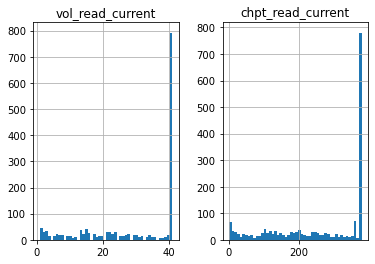

In [232]:
# Histogram of volume_read_current and chpt_read_current for file_index = 0. Title: Berserk
user_scores[user_scores['file_index']==0][['vol_read_current', 'chpt_read_current']].hist(bins=50)

array([[<AxesSubplot:title={'center':'vol_read_current'}>,
        <AxesSubplot:title={'center':'chpt_read_current'}>]], dtype=object)

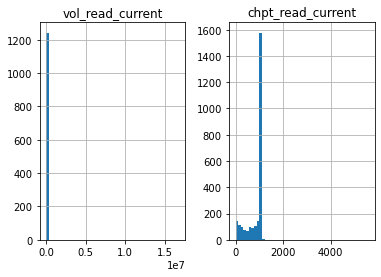

In [233]:
# Histogram of volume_read_current and chpt_read_current for file_index = 2. Title: One Piece
user_scores[user_scores['file_index']==2][['vol_read_current', 'chpt_read_current']].hist(bins=50)

array([[<AxesSubplot:title={'center':'vol_read_current'}>,
        <AxesSubplot:title={'center':'chpt_read_current'}>]], dtype=object)

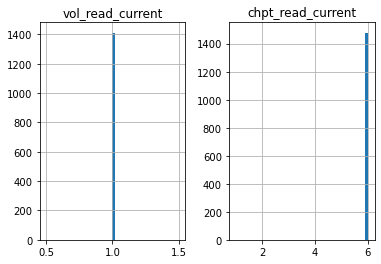

In [234]:
# Histogram of volume_read_current and chpt_read_current for file_index = 10000. Title: Jisatsu Circle
user_scores[user_scores['file_index']==10000][['vol_read_current', 'chpt_read_current']].hist(bins=50)

In [235]:
# Estimate last vol and chpt for each title
# Using 95 percentile because it works relatively well for the titles tested
estimated_last = {}
estimated_last['file_index'] = [i for i in user_scores['file_index'].unique()]
estimated_last['estimated_last_chpt'] = [np.percentile(user_scores[user_scores['file_index']==i]['chpt_read_current'].dropna(), [95])[0] for i in user_scores['file_index'].unique()]
estimated_last['estimated_last_vol'] = [np.percentile(user_scores[user_scores['file_index']==i]['vol_read_current'].dropna(), [95])[0] for i in user_scores['file_index'].unique()]

# Make into DataFrame
estimated_last_pd = pd.DataFrame.from_dict(estimated_last)

In [236]:
#estimated_last_pd.loc[estimated_last_pd[estimated_last_pd['estimated_last_chpt'] < estimated_last_pd['estimated_last_vol']].index, ['estimated_last_chpt', 'estimated_last_vol']] = np.nan

In [237]:
# merge estimated last vol and estimated last chpt with user score table
user_scores = user_scores.merge(estimated_last_pd, left_on='file_index', right_on='file_index')

In [238]:
# Compare and get the min of vol_read_last and estimated_last_vol and min of chpt_read_last and estimated_last_chpt
user_scores['last_vol'] = user_scores[['vol_read_last', 'estimated_last_vol']].min(axis=1)
user_scores['last_chpt'] = user_scores[['chpt_read_last', 'estimated_last_chpt']].min(axis=1)

In [239]:
# Calculate percentage of vol read and chpt read
user_scores['pct_vol_read'] = user_scores['vol_read_current'] / user_scores['last_vol']
user_scores['pct_chpt_read'] = user_scores['chpt_read_current'] / user_scores['last_chpt']

In [240]:
# Calculate the max amount of content the user had read
user_scores['max_content_read'] = user_scores[['pct_vol_read', 'pct_chpt_read'] ].max(axis=1)

In [241]:
# Drop rows where max_content_read is NA
user_scores.dropna(subset=['max_content_read'], inplace=True)

# Drop rows where max_content_read is greater than 1
user_scores.drop(index=user_scores[user_scores['max_content_read'] > 1].index, inplace=True)

# Drop unneeded columns
user_scores.drop(columns=['vol_read', 'chpt_read', 'vol_read_current', 'vol_read_last',
                        'chpt_read_current', 'chpt_read_last', 'estimated_last_vol',
                        'estimated_last_chpt', 'pct_vol_read', 'pct_chpt_read'], inplace=True)

In [242]:
user_scores.to_csv("../data_cleaned/users_scores_cleaned.csv", index=False)